# Chapter 3: 分類問題　−機械学習ライブラリ scikit-learnの活用
  
## 分類アルゴリズムの選択
  
機械学習のアルゴリズムのトレーニングは、以下の主要な5ステップから構成される。  
  
1. 特徴量を選択する。  
2. 性能指標を選択する。
3. 分類器と最適化アルゴリズムを選択する。  
4. モデルの性能を評価する。
5. アルゴリズムを調整する。  
  
  
## scikit-learnを使ったパーセプトロンのトレーニング
  
scikit-learnにすでに用意されているIrisデータを利用してトレーニングを行う。  
また、ここでは可視化のために、Irisデータセットの特徴量を2つだけ使用する。  
150個のサンプルの「花びらの長さ」と「花びらの広さ」を特徴行列$X$に代入し、  
対応する品種のクラスラベルをベクトル$y$に代入する  
  

In [1]:
from sklearn import datasets
import numpy as np
# Loading Iris dataset
iris = datasets.load_iris()

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
# We need petal datasb
# Extracting features in the 3rd and 4th column
X = iris.data[:, [2, 3]]
# Getting class labels
y = iris.target

以下の結果から、すでに$y$にクラスラベルが整数値として格納されていることがわかる。  
**クラスラベルの文字列から整数への変換は、多くの機械学習ライブラリで推奨されている方法である。**

In [3]:
# np.unique() returns unique values
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


トレーニングされたモデルの性能を未知のデータで評価するために、  
データセットを更にトレーニングセットとテストデータセットに分割する。  
（詳しくは5章を参照）  
  
scikit-learnの`cross_validation`モジュールの`train_test_split`関数を使用して、  
$X$配列と$y$配列を30%のテストデータと70%のトレーニングデータにランダムに分割している。  

In [4]:
from sklearn.cross_validation import train_test_split
# Spliiting data to train data and test data
# train data has 30% of all the data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

/home/tk/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


`train_test_split`関数はランダムにデータを分割するが、パラメータのチューニングの結果を比較したいときなど分割方法を固定したい場合がある。  
そういう分割結果を再現したい場合に`random_state`に何か特定の数字を指定すれば、再度同じ数字を指定した時に同じ結果を返してくれる。  
その数字は0でも13でも42でも何でも構わない。ここでは0を指定しているだけで、引数がバイナリ値（Boolean）ではないことに注意したい。  
  
機械学習と最適化の多くのアルゴリズムでは、最適な性能をえるために特徴量のスケーリング（標準化）が必要になる。  
ここではscikit-learnの`preprocessing`モジュールの`StandardScaler`クラスを使って特徴量を標準化する。

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Calculating the mean and std of train data
sc.fit(X_train)
# Standardizing with the mean and std
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

`StandardScaler`の`fit`メソッドを呼び出すことで、トレーニングデータから特徴量ごとにパラメータ$\mu$（平均値）と$\sigma$（標準偏差）を推定している。  
次に`transform`メソッドを呼び出し、推定されたパラメータ$\mu$と$\sigma$を使ってトレーニングデータを標準化している。  
**テストデータを標準化するのに同じスケーリングパラメータを使用したことに注意する。**  
これはトレーニングデータセットとテストデータセットの値を相互に比較できるようにするためだ。  
  
トレーニングセットを標準化したので、パーセプトロンモデルをトレーニングできるようになった。  
scikit-learnのほとんどのアルゴリズムは他クラス分類をサポートしており、一対他（OvR）手法が使用されているため  
3つの品種クラスをパーセプトロンに同時に与えることができる。  

In [14]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)
ppn.fit(X_train_std, y_train)

/home/tk/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

ここでの挙動は以下の通り。  
まず`linenar_model`モジュールから`Perceptron`クラスを読み込んだ後、  
`Perceptron`の新しいインスタンスを初期化し、`fit`メソッドを使ってモデルをトレーニングしている。  
  
パラメータ  
- `n_iter`:  エポック数  
- `eta0`:    学習率
- `shuffle`: エポックごとにトレーニングデータをシャッフルするか/普通はするらしい
  
また、ここではエポックごとにトレーニングデータセットの並び替えを再現できるように`randome_state`を指定している。  
  
パラーメータの詳細は[こちら](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)。  
  
トレーニングを行った後は、`predict`メソッドを使って予測を行う。

In [15]:
y_pred = ppn.predict(X_test_std)
# How many misclassifications do we have?
print('Misclassified samples: {}'.format((y_test != y_pred).sum()))

Misclassified samples: 4


scikit-learnでは`metrics`モジュールを利用することでモデルの性能指標を知ることができる。  
以下の例では、真のクラスラベル`y_test`と予測したクラスラベル`y_pred`を比較している。

In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9111111111111111


最後にパーセプトロンモデルの決定領域をプロットし、与えられたデータに対してどの程度識別できるのかを可視化してみる。

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# I'm not sure how it works about gritpoint and the following parts
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

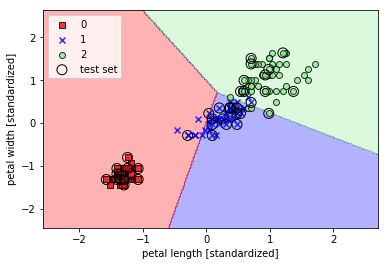

In [20]:
# Merge train data and test data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
# Plot
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## ロジスティック回帰を使ったクラスの確率のモデリング
  
パーセプトロンは、クラスを完全に線形分離できない場合は決して収束しない。（＝非線形関数の表現ができない）  
ロジスティック回帰は線形分類問題と二値分類問題に高い性能を発揮する。  
  
ロジスティック回帰の概念を理解するために、まずは*オッズ比（odds ratio）*から見ていく。
オッズ比は事象の起こりやすさを表すもので、$\begin{eqnarray}\frac{p}{(1-p)}\end{eqnarray}$と書くことができる。  
$p$は*正事象*の確率を表す。正事象とは予測したい事象を表す。（＝クラスラベル$y=1$）  
ロジット（logit）関数はオッズ比の対数を取ったものになる。
  
$\begin{eqnarray}logit(p)=log \frac{p}{(1-p)}\end{eqnarray}$  
  
ロジット関数は0よりも大きく、1よりも小さい範囲の入力値を受け取り、実数の全範囲の値に変換する。  
ここで実際に関心があるのは、サンプルが特定のクラスに属している確率を予想することである。  
これはロジット関数の逆関数であり、*ロジスティック（logistic）関数*、*シグモイド（sigmoid）関数*と呼ばれる。
  
$\begin{eqnarray}\phi(z)=\frac{1}{1+e^{-z}}\end{eqnarray}$  
  
この場合の$z$は総入力である。  
  
$\begin{eqnarray}z={\bf w^{T}x}=w_{0}+w_{1}x_{1}+\cdots+w_{m}x_{m}\end{eqnarray}$  
  
では、−7以上7未満の範囲にある値のシグモイド関数をプロットしてみる。  

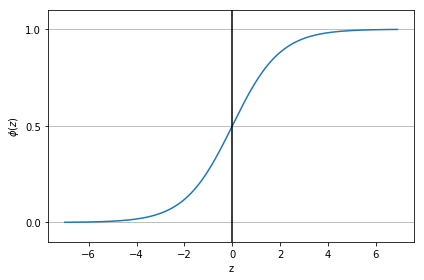

In [23]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()

ロジスティック回帰のコスト関数として対数尤度（loglikelihood）関数が用いられるが、ここでは割愛する。  
では実際にロジスティック回帰でトレーニングをしてみる。

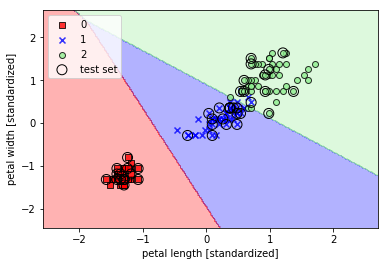

In [29]:
from sklearn.linear_model import LogisticRegression
# make an instance
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

`C`は正規化のパラメータ。Cが大きくなるほど正規化が弱くなり、重みが大きくなる。  


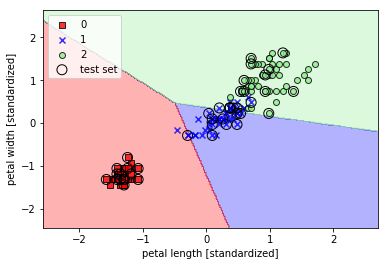

In [31]:
from sklearn.linear_model import LogisticRegression
# make an instance
lr2 = LogisticRegression(C=1, random_state=0)
lr2.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr2,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [33]:
lr_result = lr.predict_proba(X_test_std[])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01],
       [6.08753106e-04, 9.99285569e-01, 1.05678028e-04],
       [8.16962653e-01, 1.83037347e-01, 6.48299403e-14],
       [1.60866539e-11, 4.14084479e-01, 5.85915521e-01],
       [8.00231776e-01, 1.99768224e-01, 1.07576258e-13],
       [2.03283749e-13, 1.38353563e-01, 8.61646437e-01],
       [8.64726967e-01, 1.35273033e-01, 9.27705289e-14],
       [4.92680691e-07, 7.61844645e-01, 2.38154862e-01],
       [6.63326495e-07, 8.43292211e-01, 1.56707126e-01],
       [8.06447009e-05, 9.97737477e-01, 2.18187798e-03],
       [9.03984802e-09, 4.62107297e-01, 5.37892694e-01],
       [1.54213753e-06, 8.75626483e-01, 1.24371975e-01],
       [5.21240195e-06, 9.81860065e-01, 1.81347231e-02],
       [8.78337572e-07, 8.24894420e-01, 1.75104701e-01],
       [1.13609831e-06, 8.90634747e-01, 1.09364117e-01],
       [7.63277074e-01, 2.36722926e-01, 4.48028267e-14],
       [1.54213753e-06, 8.75626483e-01, 1.24371975e-01],
       [2.17883410e-05, 9.95361